# STAT 201 Group Proposal Group 27
___________________________________________

# Title: Relationships on Academic Performance

## Introduction:

Add dataset here


### Preliminary Results


In [2]:
# Libraries required for the proposal
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse) 
library(tidymodels)
library(datasets)
library(rvest)
library(tibble) 
library(httr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ recipes      1.0.8     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr:

In [3]:
student_gpa <- read_csv('./student_prediction.csv')
head(student_gpa) # First 6 data

Rows: 145 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): STUDENTID
dbl (32): AGE, GENDER, HS_TYPE, SCHOLARSHIP, WORK, ACTIVITY, PARTNER, SALARY...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,⋯,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,2,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


In [14]:
student_gpa |> summarize(PartnerCount = sum(PARTNER == 1),
                       NoPartnerCount = sum(PARTNER == 2))

PartnerCount,NoPartnerCount
<int>,<int>
61,84


### Data wrangling

Whether a person has a partner or not is represented by 1- for Yes and 2- for No. We tidy this up so that it is much more clear to read and understand. In the process, we select the two columns that we are interested in, whether an individual has a partner, and their cumulative GPA.
We can then group these students by whether they have a partner or not, and calculate the sample mean of their cumulative GPA.


In [4]:
partner_data <- student_gpa |> select(STUDENTID, PARTNER, CUML_GPA) |> mutate(PARTNER = recode(PARTNER, '1' = "Yes", '2' = "No"))
head(partner_data)

STUDENTID,PARTNER,CUML_GPA
<chr>,<chr>,<dbl>
STUDENT1,No,1
STUDENT2,No,2
STUDENT3,No,2
STUDENT4,Yes,3
STUDENT5,Yes,2
STUDENT6,No,4


In [5]:
mean_gpas <- partner_data |> group_by(PARTNER) |> summarize(GPA = mean(CUML_GPA))
head(mean_gpas)


PARTNER,GPA
<chr>,<dbl>
No,3.059524
Yes,3.213115


### Visualization

In order to compare the student performance with the factor PARNTER, we visualize the distribution of cumulative GPA separately, for student with Partner and without Partner. We compare the sample distribution of Students' GPA, finding if there have difference in school performance.

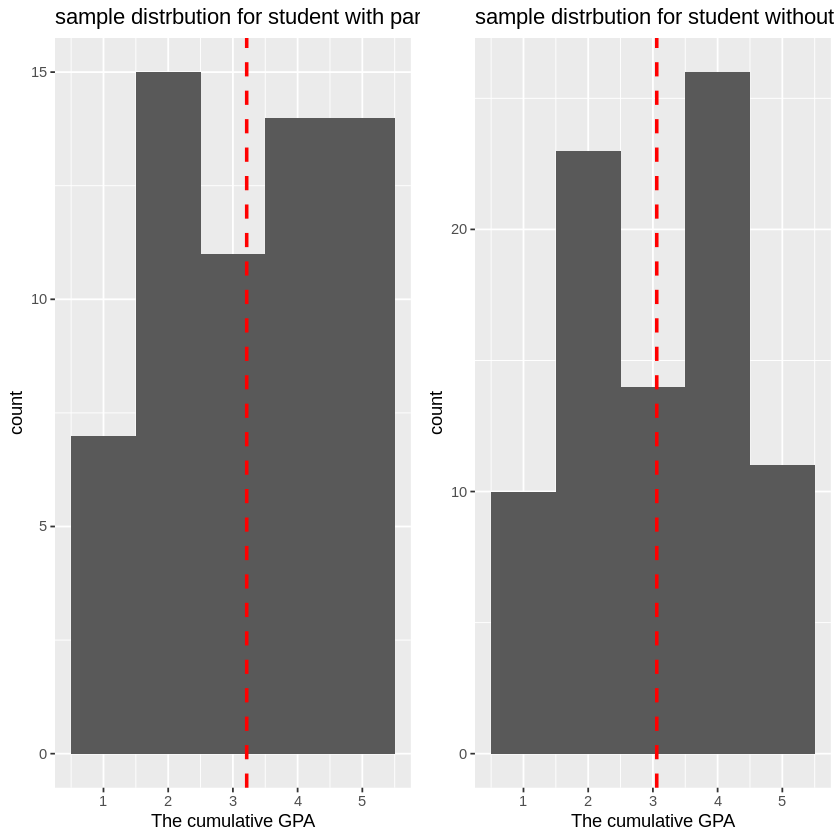

In [25]:
#sample distribution of GPA for student with Parnter
partner_stu_gpa_plot <- partner_data |>
filter(PARTNER == "Yes")|>
ggplot(aes(x = CUML_GPA))+
geom_histogram(binwidth = 1) +
geom_vline(aes(xintercept = 3.213115), color = "red", linetype = "dashed", size = 1) +
ggtitle("sample distrbution for student with partner GPA distribution")+
xlab("The cumulative GPA")

#sample distribution of GPA for student without Parnter
no_partner_stu_gpa_plot <- partner_data |>
filter(PARTNER == "No")|>
ggplot(aes(x = CUML_GPA))+
geom_histogram(binwidth = 1) +
geom_vline(aes(xintercept = 3.059524), color = "red", linetype = "dashed", size = 1)+
ggtitle("sample distrbution for student without partner GPA distribution")+
xlab("The cumulative GPA")

plot_grid(partner_stu_gpa_plot,no_partner_stu_gpa_plot)

We found that the sample mean for student with parnter slightly higher than that of student without parnter. 
The cumulative GPA distributions also show different pattern.

### Methods: Plan

### References..

In [23]:
...

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context
